<a href="https://colab.research.google.com/github/yureodopo/clubesdeciencia/blob/master/CDMX_FEBRERO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Modeling through Markov Chains: a practical example.**

In this Google Colab Notebook, you will find a 

---

practical example of how to implement a Discrete-Time Markov Chain Model to predict an outcome of a common problem. For this purpose, you will only need to make a copy of this file, Python, and a few libraries. 

##**Problem description** 

Suppose you are working on a company that wants to evaluate how often consumers select one product over another. For example, an individual may buy a Razor notebook, and the next time changes their choice to a more expensive Dron notebook, or a cheaper Soul Notebook. For obvious reasons, the company wants to know the behavior of buyers through time to guarantee that more clients choose the most expensive item.

Your first way to solve this problem was to evaluate the buyers' behavior using Discrete-Time Markov Chains (DTMC) implemented in Python, as described below. 

In order to implement DTMC you will need to import some Modules 

In [2]:

#Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from matplotlib.collections import PatchCollection
from random import seed
from random import random

#**Defining state space** 

At this point, you have a random variable named bought notebook. This variable has three possible states which represent the buyable items: Razor, Dron, and Soul Notebooks. Hence,  S = {Razor, Dron, Soul}.

In [3]:
  states = ["Susceptible", "Infectado", "Recuperado"]

#**Determining states association and transition probabilities**

In this section, you decided to code a directed graph to evaluate how states are connected and what are the probabilities of going from state 1 to state 2 or state 3.

In [4]:
#Defining possible transitions between states
transitionStates = [["SS", "SI", "SR"], 
                    ["IS", "II", "IR"], 
                    ["RS", "RI", "RR"]]

#**Clients' choices between Notebooks** 

**First buy**: Razor <br>
Total amount of people analyzed: 1000 <br>
-Second buy: Razor <br>
Amount of people who bought it: 200 <br>
-Second buy: Dron <br>
Amount of people who bought it: 600 <br>
-Second buy: Soul <br>
Amount of people who bought it: 200 <br>
**First buy**: Dron <br>
Total amount of people analyzed: 1000 <br>
-Second buy: Razor <br>
Amount of people who bought it: 100 <br>
-Second buy: Dron <br>
Amount of people who bought it: 600 <br>
-Second buy: Soul <br>
Amount of people who bought it: 300 <br>
**First buy**: Soul <br>
Total amount of people analyzed: 1000 <br>
-Second buy: Razor <br>
Amount of people who bought it: 200 <br>
-Second buy: Dron <br>
Amount of people who bought it: 700 <br>
-Second buy: Soul <br>
Amount of people who bought it: 100 <br>

An analysis of clients' choice found that there is a different proportion of selection between notebooks. For example in the object `transitionMatrix`, the first 0.2 means that a client who bought a Razor notebook in the past will repeat his choice. On the other hand, 0.6 means that a buyer who bought a razor notebook is going to buy a Dron notebook instead.

In [5]:
#Establishing transition probabilities between states.    #CDMX

transitionMatrix = [[0.9999,0.0001 , 0], 
                    [0,0.0029 ,0.9971 ], 
                    [0, 0, 1]]

#IMPORTANT NOTE: the sum of probabilities within square brackets must be equal to one

#**Code to generate a simple directed graph** (Thanks to Naysan Saran)
https://naysan.ca/2020/07/08/drawing-state-transition-diagrams-in-python/

In [6]:
class Node:
    
    def __init__(
        self, center, radius, label, 
        facecolor='#2693de', edgecolor='#e6e6e6',
        ring_facecolor='#a3a3a3', ring_edgecolor='#a3a3a3'
        ):
        """
        Initializes a Markov Chain Node(for drawing purposes)
        Inputs:
            - center : Node (x,y) center
            - radius : Node radius
            - label  : Node label
        """
        self.center = center
        self.radius = radius
        self.label  = label

        # For convinience: x, y coordinates of the center
        self.x = center[0]
        self.y = center[1]
        
        # Drawing config
        self.node_facecolor = facecolor
        self.node_edgecolor = edgecolor
        
        self.ring_facecolor = ring_facecolor
        self.ring_edgecolor = ring_edgecolor
        self.ring_width = 0.03  
        
        self.text_args = {
            'ha': 'center', 
            'va': 'center', 
            'fontsize': 16
        }
    
    
    def add_circle(self, ax):
        """
        Add the annotated circle for the node
        """
        circle = mpatches.Circle(self.center, self.radius)
        p = PatchCollection(
            [circle], 
            edgecolor = self.node_edgecolor, 
            facecolor = self.node_facecolor
        )
        ax.add_collection(p)
        ax.annotate(
            self.label, 
            xy = self.center, 
            color = '#ffffff', 
            **self.text_args
        )
        
        
    def add_self_loop(self, ax, prob=None, direction='up'):
        """
        Draws a self loop
        """
        if direction == 'up':
            start = -30
            angle = 180
            ring_x = self.x
            ring_y = self.y + self.radius
            prob_y = self.y + 1.3*self.radius
            x_cent = ring_x - self.radius + (self.ring_width/2)
            y_cent = ring_y - 0.15
        else:
            start = -210
            angle = 0
            ring_x = self.x
            ring_y = self.y - self.radius
            prob_y = self.y - 1.4*self.radius
            x_cent = ring_x + self.radius - (self.ring_width/2)
            y_cent = ring_y + 0.15
            
        # Add the ring
        ring = mpatches.Wedge(
            (ring_x, ring_y), 
            self.radius, 
            start, 
            angle, 
            width = self.ring_width
        )
        # Add the triangle (arrow)
        offset = 0.2
        left   = [x_cent - offset, ring_y]
        right  = [x_cent + offset, ring_y]
        bottom = [(left[0]+right[0])/2., y_cent]
        arrow  = plt.Polygon([left, right, bottom, left])

        p = PatchCollection(
            [ring, arrow], 
            edgecolor = self.ring_edgecolor, 
            facecolor = self.ring_facecolor
        )
        ax.add_collection(p)
        
        # Probability to add?
        if prob:
            ax.annotate(str(prob), xy=(self.x, prob_y), color='#000000', **self.text_args)

class MarkovChain:

    def __init__(self, M, labels):
        """
        Initializes a Markov Chain (for drawing purposes)
        Inputs:
            - M         Transition Matrix
            - labels    State Labels
        """

        if M.shape[0] < 2:
            raise Exception("There should be at least 2 states")
        if M.shape[0] > 4:
            raise Exception("Only works with 4 states max for now")
        if M.shape[0] != M.shape[1]:
            raise Exception("Transition matrix should be square")
        if M.shape[0] != len(labels):
            raise Exception("There should be as many labels as states")

        self.M = M
        self.n_states = M.shape[0]
        self.labels = labels

        # Colors
        self.arrow_facecolor = '#a3a3a3'
        self.arrow_edgecolor = '#a3a3a3'

        self.node_facecolor = '#2693de'
        self.node_edgecolor = '#e6e6e6'

        # Drawing config
        self.node_radius = 0.5
        self.arrow_width = 0.03
        self.arrow_head_width = 0.20
        self.text_args = {
            'ha': 'center',
            'va': 'center',
            'fontsize': 16
        }

        # Build the network
        self.build_network()


    def set_node_centers(self):
        """
        Positions the node centers given the number of states
        """
        # Node positions
        self.node_centers = []

        if self.n_states == 2:
            self.figsize = (10, 4)
            self.xlim = (-5, 5)
            self.ylim = (-2, 2)
            self.node_centers = [[-4,0], [4,0]]
        elif self.n_states == 3:
            self.figsize = (10, 6)
            self.xlim = (-5, 5)
            self.ylim = (-3, 3)
            self.node_centers = [[-3,-2], [3,-2], [-3,2]]
        elif self.n_states == 4:
            self.figsize = (8, 8)
            self.xlim = (-5, 5)
            self.ylim = (-5, 5)
            self.node_centers = [[-4,4], [4,4], [4,-4], [-4,-4]]


    def build_network(self):
        """
        Loops through the matrix, add the nodes
        """
        # Position the node centers
        self.set_node_centers()

        # Set the nodes
        self.nodes = []
        for i in range(self.n_states):
            node = Node(
                self.node_centers[i],
                self.node_radius,
                self.labels[i]
            )
            self.nodes.append(node)


    def add_arrow(self, ax, node1, node2, prob=None):
        """
        Add a directed arrow between two nodes
        """
        # x,y start of the arrow
        x_start = node1.x + np.sign(node2.x-node1.x) * node1.radius
        y_start = node1.y + np.sign(node2.y-node1.y) * node1.radius

        # arrow length
        dx = abs(node1.x - node2.x) - 2.5* node1.radius
        dy = abs(node1.y - node2.y) - 2.5* node1.radius

        # we don't want xoffset and yoffset to both be non-nul
        yoffset = 0.4 * self.node_radius * np.sign(node2.x-node1.x)
        if yoffset == 0:
            xoffset = 0.4 * self.node_radius * np.sign(node2.y-node1.y)
        else:
            xoffset = 0

        arrow = mpatches.FancyArrow(
            x_start + xoffset,
            y_start + yoffset,
            dx * np.sign(node2.x-node1.x),
            dy * np.sign(node2.y-node1.y),
            width = self.arrow_width,
            head_width = self.arrow_head_width
        )
        p = PatchCollection(
            [arrow],
            edgecolor = self.arrow_edgecolor,
            facecolor = self.arrow_facecolor
        )
        ax.add_collection(p)

        # Probability to add?
        x_prob = x_start + xoffset + 0.2*dx*np.sign(node2.x-node1.x)
        y_prob = y_start + yoffset + 0.2*dy*np.sign(node2.y-node1.y)
        if prob:
            ax.annotate(str(prob), xy=(x_prob, y_prob), color='#000000', **self.text_args)


    def draw(self, img_path=None):
        """
        Draw the Markov Chain
        """
        fig, ax = plt.subplots(figsize=self.figsize)

        # Set the axis limits
        plt.xlim(self.xlim)
        plt.ylim(self.ylim)

        # Draw the nodes
        for node in self.nodes:
            node.add_circle(ax)

        # Add the transitions
        for i in range(self.M.shape[0]):
            for j in range(self.M.shape[1]):
                # self loops
                if i == j:
                    # Loop direction
                    if self.nodes[i].y >= 0:
                        self.nodes[i].add_self_loop(ax, prob = self.M[i,j], direction='up')
                    else:
                        self.nodes[i].add_self_loop(ax, prob = self.M[i,j], direction='down')
                # directed arrows
                elif self.M[i,j] > 0:
                    self.add_arrow(ax, self.nodes[i], self.nodes[j], prob = self.M[i,j])

        plt.axis('off')
        # Save the image to disk?
        if img_path:
            plt.savefig(img_path)
        plt.show()

#**Directed graph**

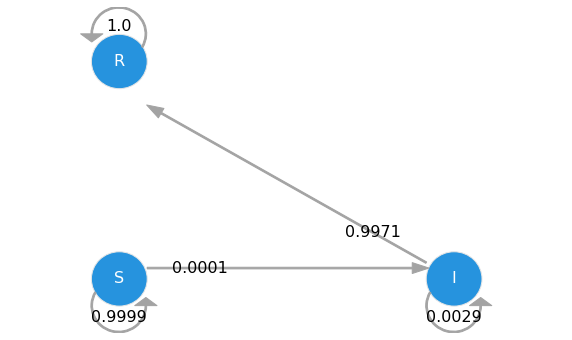

AttributeError: ignored

In [11]:
#Formatting the transition matrix as a numpy array
P = np.array(transitionMatrix)
#Using Class MarkovChain (array, labels)
DG = MarkovChain(P, ['S', 'I', 'R'])
#Drawaing the Directed Graph
DG.draw()

DG.savefig('esquema.png')

#**Modeling Clients' behavior**

Below you can predict the probability of a series of events to happen. For example, one client buys a Razor notebook at first. What is the chance that this person buys a Dron or Soul Notebook the next time? and the next one?  

In [ ]:
#Coding a function to model through several sales
def prediction(sales):
    #Initial State

    initialbuy = "Susceptible"
    print("Start State: " + initialbuy)

    #At the begining, we store our activities within a list, and we only have the initial activity
    buyList = [initialbuy]
    #we specify an index (i=0), and we know that its propability is equal to 1. In other words, this is happening for sure.
    i = 0
    prob = 1

#Initiate a while loop that continues only if i is not equal to sales  
    while i != sales:
        if initialbuy == "Susceptible":
            #Select a random sample from all possible transitions between established states.
            #np.random.choice(a, replace=?, p=?)
            #a = an array from where we are going to generate a random samples using its elements
            #replace = samples can be taken with or without replacement
            #p = probabilities associated with elements in a
            change = np.random.choice(transitionStates[0], replace=True, p = transitionMatrix[0])

            #Here, the if statement shows that random sample generated and stored in object "change" is RR.
            #When this happen we modify the prob object by multlipying it by this probability.
            #Then we append the result of random sample in activityList.
            if change == "SS":
                prob = prob * 0.2
                buyList.append("Susceptible")
                #pass statement is used for not getting an error 
                pass
            #Here, the elif statement shows that random sample generated and stored in object "change" is RD.    
            elif change == "SI":
                prob = prob * 0.6
                initialbuy = "Infectado"
                buyList.append("Infectado")
            else: 
                prob = prob * 0.2
                initialbuy = "Recuperado"
                buyList.append("Recuperado")
        elif initialbuy == "Infectado":
            change = np.random.choice(transitionStates[1], replace=True, p = transitionMatrix[1])
            if change == "II":
                prob = prob * 0.6
                buyList.append("Infectado")
                pass
            elif change == "IS":
                prob = prob * 0.1
                initialbuy = "Susceptible"
                buyList.append("Susceptible")
            else:
                prob = prob * 0.3
                initialbuy = "Recuperado"
                buyList.append("Recuperado")
        elif initialbuy == "Recuperado":
            change = np.random.choice(transitionStates[2], replace = True, p = transitionMatrix[2])
            if change == "RR":
                prob = prob * 0.1
                buyList.append("Recuperado")
                pass
            elif change == "RS":
                prob = prob * 0.2
                initialbuy = "Susceptible"
                buyList.append("Susceptible")
            else:
                prob = prob * 0.7
                initialbuy = "Infectado"
                buyList.append("Infectado")
        i += 1
    print ("Possible states: " + str(buyList))
    print ("End state after "+ str(sales) + " sales: " + initialbuy)
    print ("Probability of the possible sequence of states: " + str(prob) + "\n")

prediction(1)
prediction(2)
prediction(2)
prediction(3)
prediction(4)

Start State: Susceptible
Possible states: ['Susceptible', 'Susceptible']
End state after 1 sales: Susceptible
Probability of the possible sequence of states: 0.2

Start State: Susceptible
Possible states: ['Susceptible', 'Susceptible', 'Susceptible']
End state after 2 sales: Susceptible
Probability of the possible sequence of states: 0.04000000000000001

Start State: Susceptible
Possible states: ['Susceptible', 'Susceptible', 'Susceptible']
End state after 2 sales: Susceptible
Probability of the possible sequence of states: 0.04000000000000001

Start State: Susceptible
Possible states: ['Susceptible', 'Susceptible', 'Susceptible', 'Susceptible']
End state after 3 sales: Susceptible
Probability of the possible sequence of states: 0.008000000000000002

Start State: Susceptible
Possible states: ['Susceptible', 'Susceptible', 'Susceptible', 'Susceptible', 'Susceptible']
End state after 4 sales: Susceptible
Probability of the possible sequence of states: 0.0016000000000000005



#**Finding stationary distribution (of probabilities)**

Above is an example of how we determine the probability of expecting some results. In our case, we evaluate how probable is that after buying a Razor notebook, then we repeat the purchase or change it to another item.

Now let us focus on modeling the behavior of buyers through time. We will try to find the **stationary distribution** of probabilities. It is just as the example of flipping a coin. Once we make a coin toss so many times that it tends to infinite, we get a mean chance of getting heads near 0.5 (50 %) and vice versa. What is our stationary distribution?
To calculate stationary distributions, we need to use Chapman-Kolmogorov equations. These equations lets us find future probabilities by multiplying a transition matrix by itself as many times as we want. In other words, we raise the transition matrix to the power identified by the number of desired iterations. 

[[9.999e-01 1.000e-04 0.000e+00]]
[[9.9980001e-01 1.0028000e-04 9.9710000e-05]]
[[9.99700030e-01 1.00270813e-04 1.99699188e-04]]
[[9.99600060e-01 1.00260788e-04 2.99679216e-04]]
[[9.99500100e-01 1.00250762e-04 3.99649248e-04]]
[[9.99400150e-01 1.00240737e-04 4.99609283e-04]]
[[9.99300210e-01 1.00230713e-04 5.99559322e-04]]
[[9.99200280e-01 1.00220690e-04 6.99499366e-04]]
[[9.99100360e-01 1.00210668e-04 7.99429416e-04]]
[[9.99000450e-01 1.00200647e-04 8.99349473e-04]]
[[9.98900550e-01 1.00190627e-04 9.99259538e-04]]
[[9.98800660e-01 1.00180608e-04 1.09915961e-03]]
[[9.9870078e-01 1.0017059e-04 1.1990497e-03]]
[[9.98600910e-01 1.00160573e-04 1.29892979e-03]]
[[9.98501050e-01 1.00150557e-04 1.39879990e-03]]


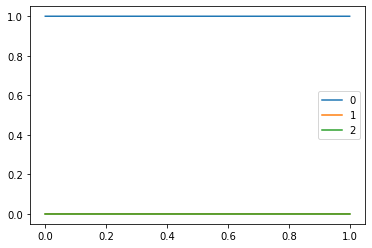

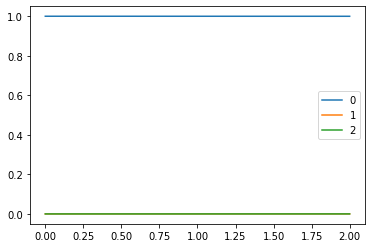

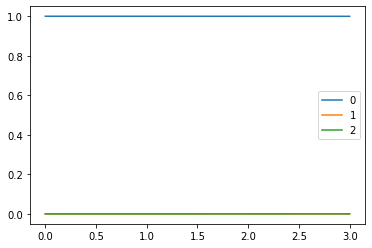

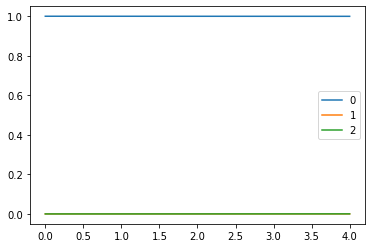

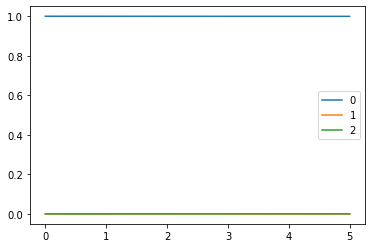

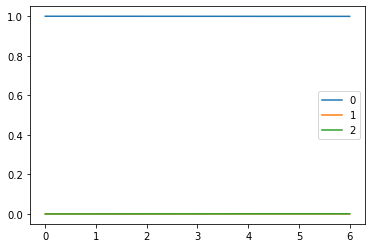

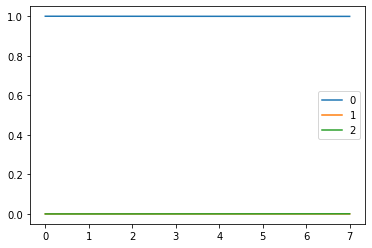

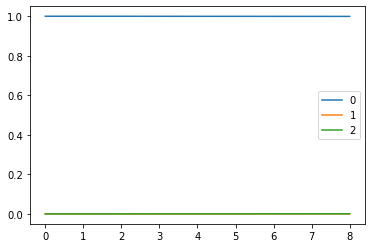

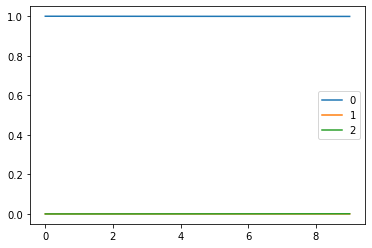

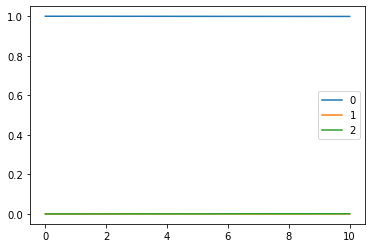

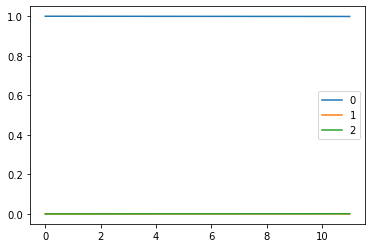

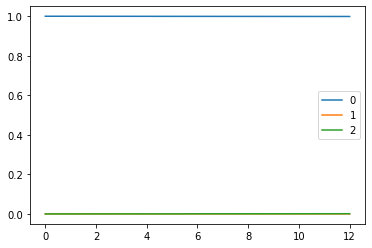

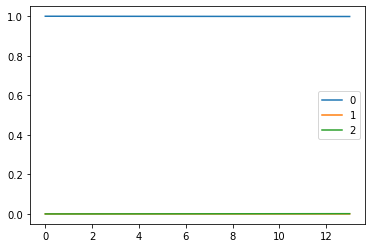

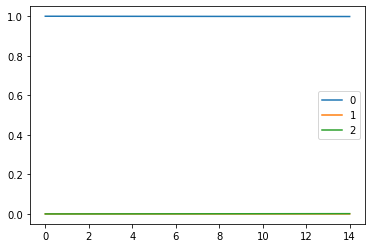

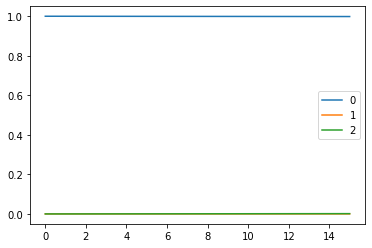

In [ ]:
#We already imported needed libraries
#To visualize relationship between states see below 
transitionStates = [["SS", "SI", "SR"], 
                    ["IS", "II", "IR"], 
                    ["RS", "RI", "RR"]]
#Just for explanation purposes, we declare our transition matrix and make it a NumPy array again...  

P =np.array([[0.9999,0.0001 , 0], 
                    [0,0.0029 ,0.9971 ], 
                    [0, 0, 1]])
#Initial state. Where do we begin? Buying a razor notebook
state=np.array([[1.0, 0.0, 0.0]])
stateHist=state
#Generate a dataframe
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
#Produce a for loop to multiply the matrix 20 times 
for x in range(15):
  state=np.dot(state,P)
  print(state)
  stateHist=np.append(stateHist,state,axis=0)
  dfDistrHist = pd.DataFrame(stateHist)
  dfDistrHist.plot()
plt.show()

**Stationary distribution**<br>
This is the amount of time spend in each state when the time tends to infinite

```
states = ["Razor", "Dron", "Soul"]
[0.13761468, 0.62385321, 0.23853211]
 0.13886114 0.62337662 0.23776224
```



**Conclusions about Stationary distribution**<br>
The data and the generated DTMC model shows us that there is a higher chance that an individual buys a Dron Notebook over time. What would you recommend? is there something to sell more Dron notebook?  

#**Simulating a Markov Chain** 

In this part, we are going to simulate a Markov Chain 

[[0.88811189 0.000999   0.11088911]]
[[0.99887514 0.00112486 0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]]


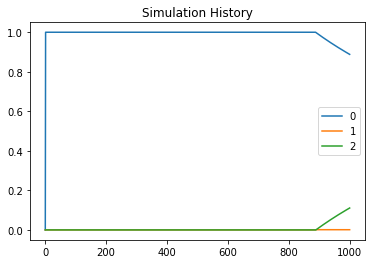

In [ ]:
#For explanation purposes we declare our transition matrix and make it a NumPy array, again... 
P =np.array( [[0.9999,0.0001 , 0], 
              [0,0.0029 ,0.9971 ], 
              [0, 0, 1]])


stateChangeHist= np.array([[0.0,  0.0,  0.0],
                          [0.0, 0.0,  0.0],
                          [0.0, 0.0,  0.0]])

#Initial state (Razor Notebook)
state=np.array([[1.0, 0.0, 0.0]])
currentState=0
stateHist=state
#Making a dataframe
dfStateHist=pd.DataFrame(state)
distr_hist = [[0,0,0]]
seed(4)
#Simulate from multinomial distribution
def simulate_multinomial(vmultinomial):
  #Taking random values from 0.0 to 1.0 which have the same probability to be chosen (Uniform)
  r=np.random.uniform(0.0, 1.0)
  #Obtaining a cumulative sum 
  CS=np.cumsum(vmultinomial)
  CS=np.insert(CS,0,0)
  m=(np.where(CS<r))[0]
  nextState=m[len(m)-1]
  return nextState
for x in range(1000):
  currentRow=np.ma.masked_values((P[currentState]), 0.0)
  nextState=simulate_multinomial(currentRow)
  #Keep track of state changes
  stateChangeHist[currentState,nextState]+=1
  #Keep track of the state vector itself
  state=np.array([[0,0,0]])
  state[0,nextState]=1.0
  #Keep track of state history
  stateHist=np.append(stateHist,state,axis=0)
  currentState=nextState
  #calculate the actual distribution over the 3 states so far
  totals=np.sum(stateHist,axis=0)
  gt=np.sum(totals)
  distrib=totals/gt
  distrib=np.reshape(distrib,(1,3))
  distr_hist = np.append(distr_hist, distrib, axis=0)
print(distrib)
P_hat=stateChangeHist/stateChangeHist.sum(axis=1)[:,None]
# Check estimated state transition probabilities based on history so far:
print(P_hat)
dfDistrHist = pd.DataFrame(distr_hist)
# Plot the distribution as the simulation progresses over time
dfDistrHist.plot(title="Simulation History")
plt.savefig('ejemplo.jpg')

